In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
app_train = pd.read_csv('C:/Users/WIN10/Desktop/Cdac_Home Credit Project/application_train.csv')

In [3]:
app_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

# app_train[['DAYS_FIRST_DRAWING',
#         'DAYS_FIRST_DUE',
#         'DAYS_LAST_DUE_1ST_VERSION',
#         'DAYS_LAST_DUE',
#         'DAYS_TERMINATION']].replace(365243, np.nan, inplace=True)

In [4]:
def replace_XNA_XAP(table):

    # Replace all values of 'XNA', 'XAP' with np.nan
    table.replace(to_replace = {'XNA': np.nan, 'XAP': np.nan}, value = None, inplace = True)
    
    return table

train_sk_id_curr = pd.DataFrame()
train_labels = pd.DataFrame()

In [5]:
train_sk_id_curr = app_train['SK_ID_CURR']
train_labels = app_train['TARGET']

In [6]:
app_train = replace_XNA_XAP(app_train)

In [7]:
app_train=app_train.drop(['TARGET','SK_ID_CURR'],axis=1)
#app_train=app_train.drop('SK_ID_CURR',axis=1)

In [8]:
def missing_values(df):
    
    total_missing = df.isnull().sum()/df.shape[0]
    percent_missing = total_missing*100
    return percent_missing.sort_values(ascending=False).round(1)

In [9]:
app_train_mis_values = missing_values(app_train)

In [10]:
df_app_train_miss_values= pd.DataFrame({'columns': app_train_mis_values.index, 'missing percent': app_train_mis_values.values})

In [11]:
drop_columns = df_app_train_miss_values[df_app_train_miss_values['missing percent'] >= 40]['columns'].tolist()
drop_columns

['COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'COMMONAREA_AVG',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_AVG',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'BASEMENTAREA_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'APARTMENTS_AVG',
 'ENTRANCES_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'LIVINGAREA_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION

In [12]:
app_train = app_train.drop(drop_columns, axis=1)

In [13]:
cat_features = [f for f in app_train.columns if app_train[f].dtype == 'object']

In [14]:
cat_df=app_train[cat_features]
cat_cols = cat_df.columns

In [15]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy = 'most_frequent')
cat_imputer.fit(cat_df)
cat_df = cat_imputer.transform(cat_df)

In [16]:
cat_df=pd.DataFrame(data=cat_df,columns=cat_cols)

In [17]:
cat_df['SK_ID_CURR'] = train_sk_id_curr

In [18]:
cat_df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,SK_ID_CURR
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,100002
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,100003
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,100004
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,100006
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,100007


In [19]:
num_features = [f for f in app_train.columns if app_train[f].dtype != 'object']

In [20]:
num_df=app_train[num_features]
num_cols = num_df.columns

In [21]:
num_imputer = SimpleImputer(strategy = 'median')
num_imputer.fit(num_df)
num_df = num_imputer.transform(num_df)

In [22]:
num_df=pd.DataFrame(data=num_df,columns=num_cols)

In [23]:
num_df['SK_ID_CURR']=train_sk_id_curr

In [24]:
app_train = num_df.merge(cat_df,on='SK_ID_CURR')

In [25]:
app_train = pd.get_dummies(app_train,drop_first=True)

In [26]:
cols = app_train.columns

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
app_train = scaler.fit_transform(app_train)

C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [28]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(app_train)

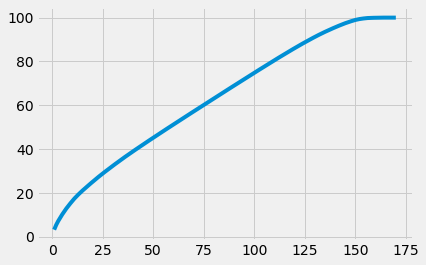

In [29]:
plt.style.use('fivethirtyeight')
y = np.cumsum(pca.explained_variance_ratio_ * 100)
x = np.arange(1,171)
plt.plot(x,y)
plt.show()

In [30]:
n_pcs = pca.components_.shape[0]

In [31]:
n_pcs

170

In [32]:
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

In [33]:
len(most_important)

170

In [34]:
initial_feature_names = cols

In [35]:
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [36]:
most_important_names

['NAME_INCOME_TYPE_Pensioner',
 'AMT_GOODS_PRICE',
 'NAME_FAMILY_STATUS_Married',
 'CODE_GENDER_M',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_3',
 'REGION_RATING_CLIENT',
 'NAME_INCOME_TYPE_State servant',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_TYPE_SUITE_Unaccompanied',
 'NAME_TYPE_SUITE_Unaccompanied',
 'OCCUPATION_TYPE_Medicine staff',
 'OCCUPATION_TYPE_Security staff',
 'OCCUPATION_TYPE_Core staff',
 'NAME_INCOME_TYPE_Working',
 'DAYS_LAST_PHONE_CHANGE',
 'NAME_INCOME_TYPE_Commercial associate',
 'ORGANIZATION_TYPE_Services',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'ORGANIZATION_TYPE_Restaurant',
 'ORGANIZATION_TYPE_Restaurant',
 'REG_CITY_NOT_LIVE_CITY',
 'WEEKDAY_APPR_PROCESS_START_TUESDAY',
 'WEEKDAY_APPR_PROCESS_START_WEDNESDAY',
 'WEEKDAY_APPR_PROCESS_START_THURSDAY',
 'WEEKDAY_APPR_PROCESS_START_THURSDAY',
 'ORGANIZATION_TYPE_Realtor',
 'NAME_FAMILY_STATUS_Separated',
 'WEEKDAY_